<a href="https://colab.research.google.com/github/priyadarshinivr19/Minors-Degree-Machine-Learning/blob/main/FMML_M4L2_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Gradient Descent**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

In [2]:
def eval_2nd_degree(coeffs, x):
    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

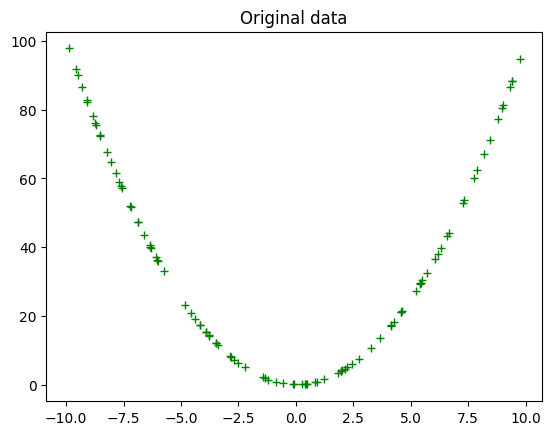

In [3]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [4]:
def eval_2nd_degree_jitter(coeffs, x, j):
    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


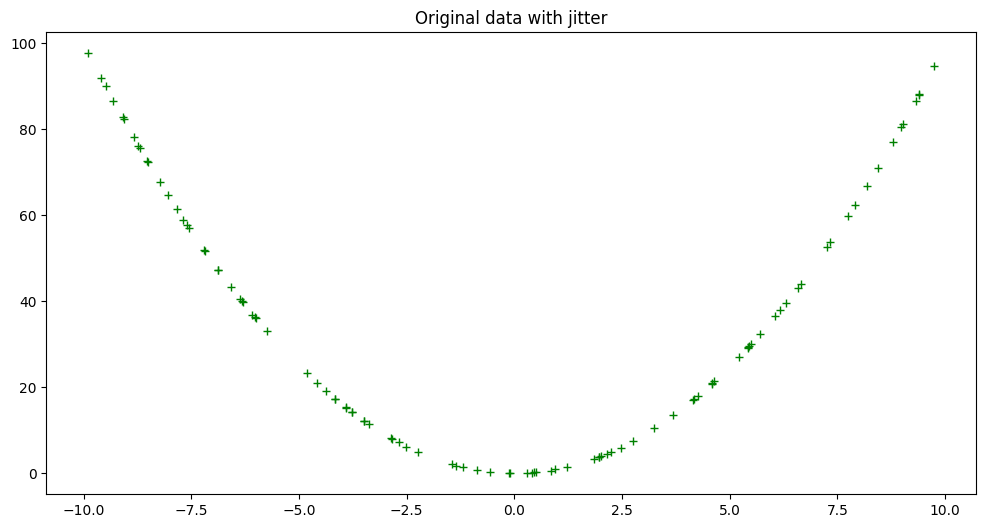

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

In [6]:
def loss_mse(ys, y_bar):
    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

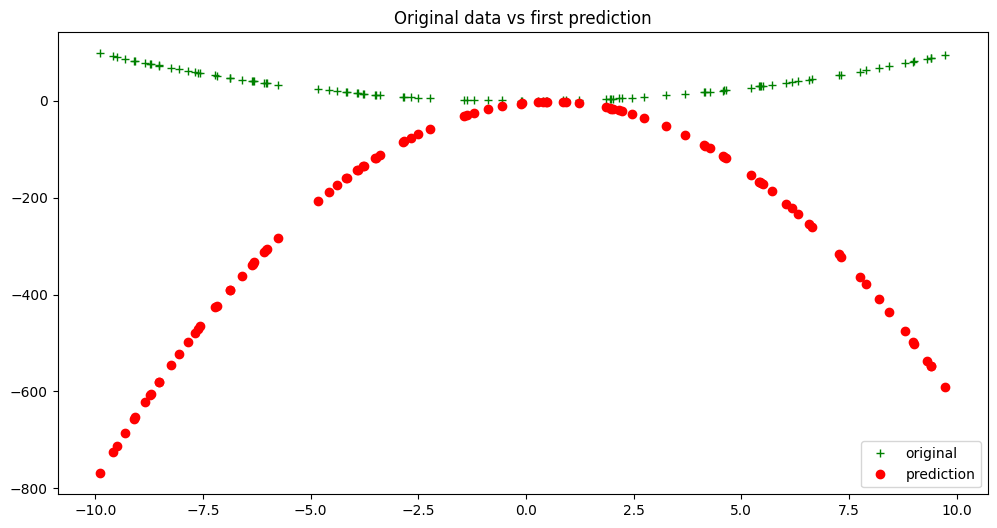

In [7]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [8]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

146807.86204726336

In [9]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [10]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-3.4872074852403587, 7.879149056895183, -4.941405407033594)
Now have smaller model loss: 49608.172144854274 vs 146807.86204726336


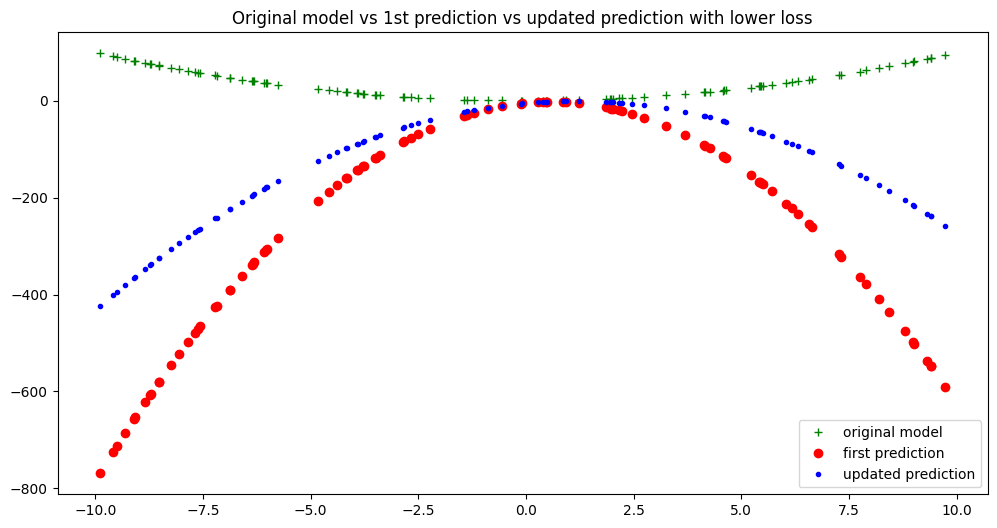

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

In [13]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [14]:
def gradient_descent(epochs, lr):
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [16]:
GD = gradient_descent(30000, 0.0003)

[13475.624637116503, 2869.715432846906, 1958.273415665309, 1815.4133533665963, 1736.1622571518062, 1664.7307185029726, 1596.5981613153112, 1531.2972754982177, 1468.6853640008349, 1408.6497165327594, 1351.0841647769712, 1295.8870592843532, 1242.960945034913, 1192.2123779132319, 1143.5517588087196, 1096.8931753375862, 1052.154250140267, 1009.2559954258945, 968.1226735021916, 928.6816630441622, 890.8633308653946, 854.6009089655777, 819.8303766371265, 786.4903474227408, 754.5219607243141, 723.8687778717832, 694.476682468427, 666.2937848366366, 639.2703303954412, 613.3586118080115, 588.5128847440168, 564.6892871080927, 541.8457615918065, 519.9419814123638, 498.9392791069297, 478.8005782568453, 459.49032802117404, 440.9744403639862, 423.2202298645435, 406.1963560041051, 389.8727678274495, 374.22065088139925, 359.2123763366603, 344.8214522031347, 331.0224765525732, 317.7910926659628, 305.1039460264636, 292.9386430819466, 281.27371170432554, 270.0885632758611, 259.3634563354952, 249.0794617210

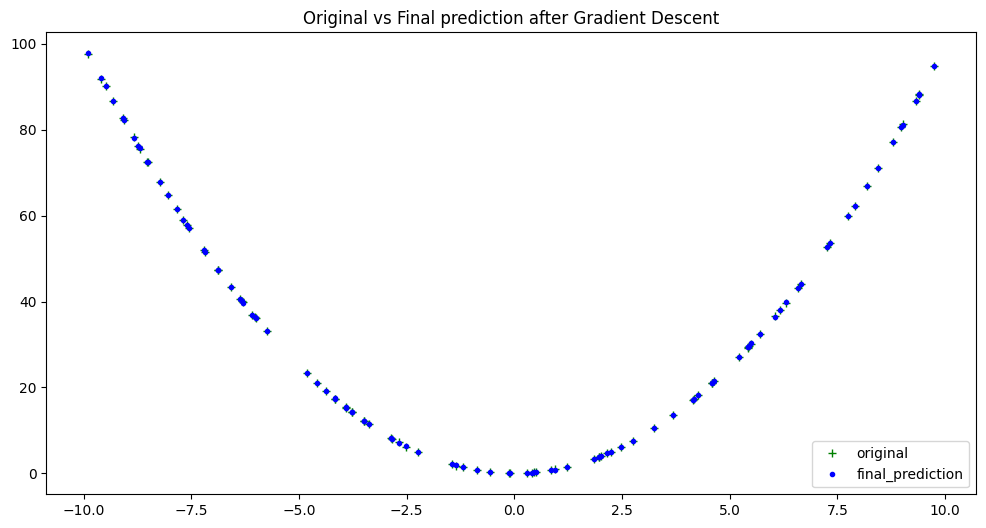

In [17]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

In [18]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (0.9999579417260247, -0.002867610798230069, -0.012778521556486263)
Original Coefficients: [1, 0, 0]


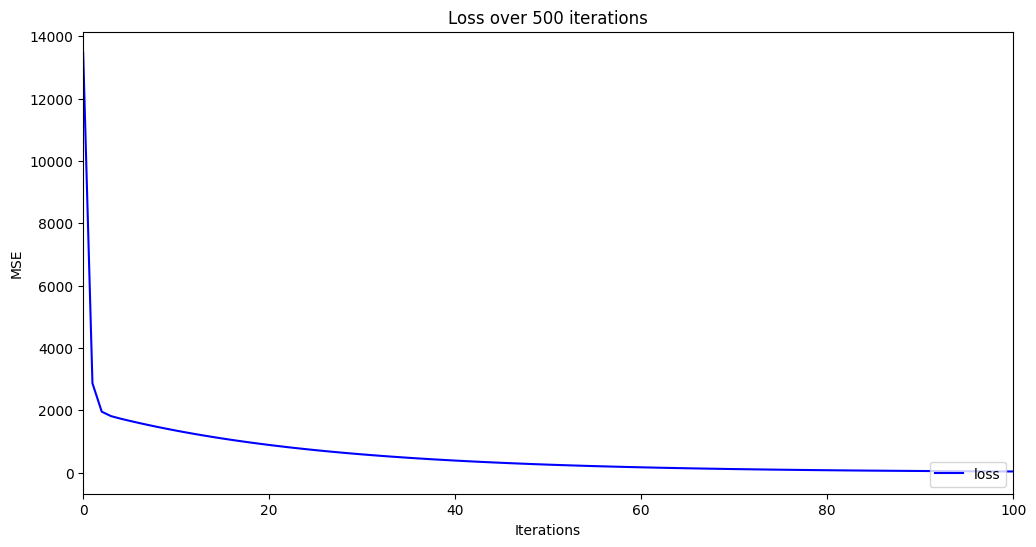

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

**Questions Set 1**

**1. Change the coefficients array and try a different polynomial instead of our  x2 .**


[12510.88392886284, 1996.2312607096214, 1124.9684051623276, 1016.8972774224465, 970.7084813048662, 930.9554416754103, 893.1959837138832, 857.0182052594039, 822.3309763633657, 789.0709087495391, 757.179116935837, 726.5992879997834, 697.2774379321314, 669.1618049283084, 642.2027570924593, 616.3527047305577, 591.5660163148816, 567.7989379112199, 545.0095159217823, 523.1575230070281, 502.20438705557876, 482.1131230767984, 462.8482678957744, 444.37581753539956, 426.6631671749812, 409.67905357936297, 393.39349989690976, 377.77776272888127, 362.80428137673056, 348.4466291777212, 334.67946684292576, 321.4784977152232, 308.8204248682853, 296.6829099708037, 285.04453384332913, 273.88475863806804, 263.1838915748622, 252.92305016932005, 243.08412889170006, 233.6497671976748, 224.60331887452946, 215.9288226486681, 207.6109740025269, 199.6350981511345, 191.98712413059928, 184.65355995277656, 177.62146878224038, 170.8784460934995, 164.41259776812083, 158.21251909308864, 152.26727462331317, 146.566378

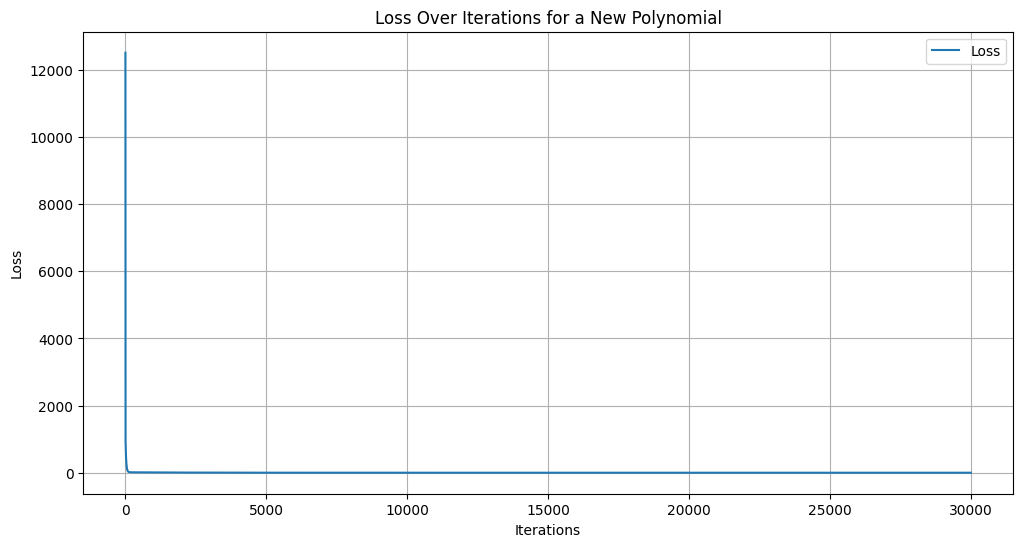

In [20]:
# Change coefficients for a new polynomial
coeffs = [1, 2, 1]  # Represents y = x^3 + 2x + 1
ys = [eval_2nd_degree(coeffs, x) + random.uniform(-0.1, 0.1) for x in hundred_xs]

# Re-run gradient descent
GD = gradient_descent(30000, 0.0003)

# Display results
print(f"Final Loss: {GD[0]}")
print(f"Final Coefficients: {GD[1]}")

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(GD[3], label="Loss")
plt.title("Loss Over Iterations for a New Polynomial")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


**2. Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?**


Learning Rate: 1e-05
[133092.11009904, 122066.63006919977, 111962.49638239498, 102702.70553046816, 94216.68975484424, 86439.77916357774, 79312.70880323737, 72781.16692841986, 66795.38102570537, 61309.73843663699, 56282.43868802979, 51675.174879594495, 47452.84170034189, 43583.2678482052, 40036.97081332367, 36786.93215589152, 33808.39156569096, 31078.658133585493, 28576.937396443376, 26284.172837189326, 24182.900631863857, 22257.116536539117, 20492.153899475263, 18874.57186869829, 17392.052942893464, 16033.309084724408, 14787.995680952938, 13646.63269354507, 12600.532400759113, 11641.733177442928, 10762.938809798936, 9957.462882060889, 9219.177811185287, 8542.46814108864, 7922.187740429064, 7353.620577684268, 6832.444774544892, 6354.699663630267, 5916.755599433364, 5515.286292387157, 5147.24345517671, 4809.833568045495, 4500.496585996061, 4216.88642558663, 3956.853082589719, 3718.426244209585, 3499.800270947277, 3299.3204336417657, 3115.4703007827684, 2946.8601799587173, 2792.2165253379

<ipython-input-6-862993522def>:2: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-6-862993522def>:2: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-13-08b72651ba44>:20: RuntimeWarning: overflow encountered in scalar add
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-13-08b72651ba44>:21: RuntimeWarning: invalid value encountered in scalar add
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-13-08b72651ba44>:25: RuntimeWarning: invalid value encountered in scalar subtract
  a_new = coeffs[0] - lr * gradient_a


[250281149.48778197, 435218245131.2592, 756808956675051.4, 1.3160289196119007e+18, 2.288466728596784e+21, 3.9794565984453384e+24, 6.919949772929552e+27, 1.203322706888556e+31, 2.0924798364549414e+34, 3.6386514115502396e+37, 6.327317407850033e+40, 1.100268782346074e+44, 1.9132774845519593e+47, 3.3270331682845697e+50, 5.7854387522141336e+53, 1.0060405130520214e+57, 1.7494222257812857e+60, 3.042102265616504e+63, 5.28996720064882e+66, 9.198820598580128e+69, 1.599599717640659e+73, 2.7815731693593683e+76, 4.8369283960064006e+79, 8.411023145395598e+82, 1.4626081794138452e+86, 2.5433560810724212e+89, 4.422688349603278e+92, 7.690693561661611e+95, 1.3373487522513067e+99, 2.32554017502904e+102, 4.04392429167784e+105, 7.032053822341674e+108, 1.222816684824564e+112, 2.12637827079004e+115, 3.6975980182481208e+118, 6.42982073903181e+121, 1.1180932738510951e+125, 1.944272818435216e+128, 3.380931520574967e+131, 5.879163581588806e+134, 1.022338494841859e+138, 1.7777630840356147e+141, 3.09138470174567e+1

<ipython-input-13-08b72651ba44>:10: RuntimeWarning: overflow encountered in scalar multiply
  partial_a = x_squared * (y - y_bar)
<ipython-input-13-08b72651ba44>:12: RuntimeWarning: overflow encountered in scalar multiply
  partial_b = x * (y - y_bar)
<ipython-input-13-08b72651ba44>:22: RuntimeWarning: overflow encountered in scalar add
  gradient_c = (-2 / n) * sum(c_s)


[2623063900953.125, 4.780432227679287e+19, 8.712170598626267e+26, 1.5877626324418567e+34, 2.893641886875531e+41, 5.273561172429973e+48, 9.610880864525316e+55, 1.751549436365727e+63, 3.192137610775206e+70, 5.817559193343817e+77, 1.0602298238590105e+85, 1.9322317866335372e+92, 3.521424877191074e+99, 6.417673723971303e+106, 1.1695985989684049e+114, 2.131552555561135e+121, 3.8846800099851476e+128, 7.079693503501511e+135, 1.2902493892595596e+143, 2.3514344027199875e+150, 4.285406989007134e+157, 7.810004412705745e+164, 1.423345999176966e+172, 2.5939983210216973e+179, 4.727471249685083e+186, 8.61565107250974e+193, 1.570172286255216e+201, 2.861584095937331e+208, 5.215136969237326e+215, 9.504404796811367e+222, 1.732144545282414e+230, 3.1567728752022446e+237, 5.753108199170467e+244, 1.0484838555020171e+252, 1.9108251699609703e+259, 3.4824120667152663e+266, 6.346574240830103e+273, 1.1566409667412143e+281, 2.1079377238468577e+288, 3.841642804798594e+295, 7.001259701699324e+302, inf, inf, inf, inf,

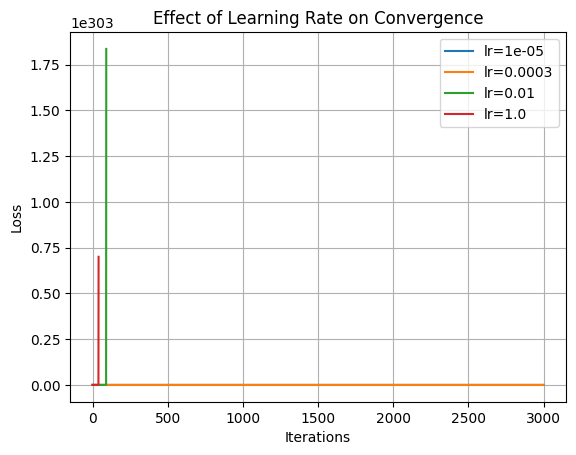

In [21]:
# Try different learning rates
learning_rates = [0.00001, 0.0003, 0.01, 1.0]
for lr in learning_rates:
    print(f"Learning Rate: {lr}")
    GD = gradient_descent(3000, lr)
    print(f"Final Loss: {GD[0]}")
    print(f"Final Coefficients: {GD[1]}")
    plt.plot(GD[3], label=f"lr={lr}")

# Plot the results
plt.title("Effect of Learning Rate on Convergence")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


Yes, a small learning rate results in smaller updates to the coefficients at each iteration. While this ensures stability and precise convergence, it takes significantly more iterations to reach an optimal solution.Also, a large learning rate can cause the algorithm to overshoot the optimal solution, leading to oscillations or divergence. The updates become so large that the coefficients "bounce" around the solution instead of approaching it steadily.

**3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of  x2 ?**


In [22]:
# Define a degree 5 polynomial
def eval_5th_degree(coeffs, x):
    return sum(c * (x ** i) for i, c in enumerate(coeffs))

# Initialize coefficients
coeffs = [1, -5, 6, -4, 3, -2]  # Example for y = x^5 - 5x^4 + 6x^3 - 4x^2 + 3x - 2
ys = [eval_5th_degree(coeffs, x) + random.uniform(-0.1, 0.1) for x in hundred_xs]

# Try different initializations
initializations = [
    (1, 0, 0, 0, 0, 0),  # All zeros except a
    (-1, 1, -1, 1, -1, 1),  # Alternating signs
    tuple(random.randrange(-10, 10) for _ in range(6)),  # Random
]

for init in initializations:
    print(f"Initialization: {init}")
    GD = gradient_descent(30000, 0.0003)
    print(f"Final Loss: {GD[0]}")
    print(f"Final Coefficients: {GD[1]}")


Initialization: (1, 0, 0, 0, 0, 0)
[3762441828.9157805, 3629933691.692405, 3527562142.0021834, 3431351952.6426144, 3339254278.9511003, 3250958133.0949626, 3166295899.084396, 3085117168.93119, 3007278537.697972, 2932642565.406075, 2861077472.3760924, 2792456901.647986, 2726659695.4839916, 2663569681.4078465, 2603075467.07469, 2545070243.583542, 2489451596.8830175, 2436121326.937117, 2384985274.331774, 2335953154.0159993, 2288938395.8840513, 2243857991.9171476, 2200632349.614813, 2159185151.4570694, 2119443220.149308, 2081336389.4119096, 2044797380.0864773, 2009761681.3398874, 1976167436.7564385, 1943955335.1169326, 1913068505.6718652, 1883452417.7237964, 1855054784.3415694, 1827825470.0364137, 1801716402.2368567, 1776681486.4061959, 1752676524.6525936, 1729659137.688115, 1707588689.9989185, 1686426218.0944397, 1666134361.7089121, 1646677297.8337095, 1628020677.4640667, 1610131564.94847, 1592978379.833613, 1576530841.1022732, 1560759913.7056093, 1545637757.2954874, 1531137677.0663128, 15

Yes, the result can depend on initialization for a higher-degree polynomial because the loss surface is more complex and may have multiple local minima. The starting point (initial coefficients) determines the direction of descent and can lead to different minima.
For
𝑦
=
𝑥
2
 , the loss surface is symmetrical with a single global minimum, so initialization does not matter. However, for
𝑦
=
(
𝑥
−
1
)
(
𝑥
+
2
)
(
𝑥
−
3
)
(
𝑥
+
4
)
(
𝑥
−
5
), initialization could lead to different final coefficients due to the more complex landscape.

The loss surface for
𝑦
=
𝑥
2
  is a simple parabola. It has:
Single global minimum: There is no possibility of getting trapped in a local minimum.
Symmetry: Regardless of the initial values, the gradient points toward the same minimum.

**4. Can you modify the algorithm to find a maxima of a function, instead of a minima?**

Final Loss (Maxima): -46454147504137.47
Final Coefficients: (-19960.826934100158, -1191251.1777178606, -50769.77281381715)


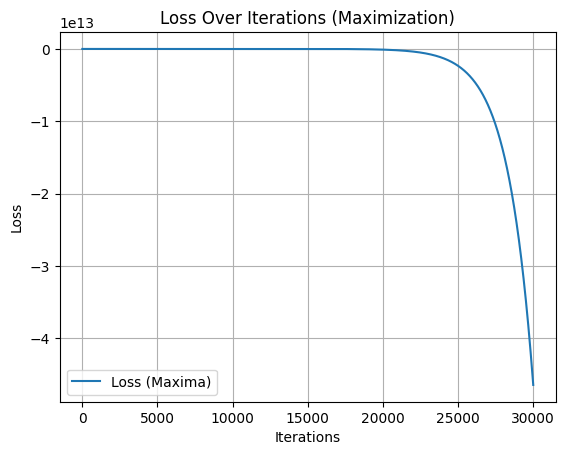

In [24]:
def gradient_ascent(epochs, lr):
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = (
            rand_coeffs_to_test[0] + lr * loss[1][0],
            rand_coeffs_to_test[1] + lr * loss[1][1],
            rand_coeffs_to_test[2] + lr * loss[1][2],
        )
        losses.append(-loss[0])  # Reverse the loss for maxima
    return -loss[0], rand_coeffs_to_test, losses

# Run gradient ascent
GA = gradient_ascent(30000, 0.0003)
print(f"Final Loss (Maxima): {GA[0]}")
print(f"Final Coefficients: {GA[1]}")

# Plot the loss over iterations
plt.plot(GA[2], label="Loss (Maxima)")
plt.title("Loss Over Iterations (Maximization)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


Yes, the algorithm converges to a maxima when the gradient update rule is reversed. By adding the gradient instead of subtracting it, the algorithm ascends the loss surface instead of descending it. This works for functions with a well-defined maximum.

**Questions Set 2**

**1. You are doing full batch gradient descent using the entire training set. Is it necessary to shuffle the training data? Explain your answer.**


No, it is not necessary to shuffle the training data when using full-batch gradient descent because the entire training dataset is used to compute the gradient at each iteration. As a result:

Every training example contributes to the gradient calculation equally in each iteration.
The order of the training data does not affect the computed gradient or the optimization process.

In full-batch gradient descent, the model sees all the data at once, and the gradient is computed as the sum (or mean) of gradients over all samples. Shuffling has no impact on this aggregate computation.

**2. You would like to train a dog/cat image classifier using mini-batch gradient descent. You have already split your dataset into train, dev and test sets. The classes are balanced. You realize that within the training set, the images are ordered in such a way that all the dog images come first and all the cat images come after. A friend tells you: ”you absolutely need to shuffle your training set before the training procedure.” Is your friend right? Explain.**

Yes, shuffling the training set is important when using mini-batch gradient descent.

Without Shuffling:
If the dataset is ordered such that all dog images are grouped together and all cat images follow, the mini-batches will consist of homogeneous classes (e.g., one batch with only dog images, another with only cat images).
This leads to poor gradient estimates because the gradients in each batch will be biased toward one class. The model may alternate between optimizing for one class (dogs) and then the other (cats), which can slow down convergence or lead to instability.

With Shuffling:
Shuffling ensures that each mini-batch is a mix of both classes, providing a better approximation of the overall gradient. This improves the stability and efficiency of training.